In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, display

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import keras

Using TensorFlow backend.


In [2]:
financialDF_R = pd.read_csv('./Datos/ds_index_next.csv', sep=',',  header=0, parse_dates=True)
financialDF_R.shape

(87438, 43)

In [3]:
financialDF_R.head()

,YEAR,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,CSR__ROA,PSDA__EARNINGS_PER_SHARE_DILUTED,CSR__ROIC,CSR__GROSS_MARGIN,VQ__YOY_EPS_GROWTH,VQ__YOY_EBITDA_GROWTH,PSDA__EBITDA_PER_SHARE,PSDA__TOTAL_DEBT_PER_SHARE,CSR__NET_MARGIN,IS__REVENUE,IS__NET_INCOME,IS__COST_OF_GOODS_SOLD,BS__TOTAL_EQUITY,IS__EBITDA,BS__TOTAL_ASSETS,BS__LONG_TERM_DEBT,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,INDUSTRY01,INDUSTRY02,RETURNS_NEXT,RETURNS_CAT,RETURNS_NEXT_CAT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX,RETURNS_vs_INDEX_NEXT
0,2014,ETE,31002.7009,72.22,28.98,8.00,5.10,7,0.56,46.73,1.44,1.10,0.570,4.68,9.29,216.67,32.40,4.193,28.211,1.14,55691.000,633.00,50516.000,22329.000,4564.00,64279.000,29477.000,6683.000,0.580,50.33,20.44,28.46,0.392368,3.472920,NaN,NaN,-0.512675,POSITIVE,NEGATIVE,0.123866,-0.006928,WINS,LOSES
1,2010,ETE,8712.4952,317.83,24.53,9.21,15.92,5,1.33,72.37,1.05,1.31,0.215,7.58,25.67,-56.57,-7.37,1.559,10.520,2.94,6556.000,193.00,4873.000,6247.732,1390.00,17378.730,9346.067,1081.075,0.215,45.44,7.65,9.53,0.245752,0.730981,NaN,NaN,0.045082,POSITIVE,POSITIVE,0.110019,-0.011220,WINS,WINS
2,2015,ETE,14384.6808,0.00,28.67,5.90,7.28,7,0.41,0.00,0.81,1.76,1.110,5.33,14.20,94.74,2.72,4.307,35.311,3.29,36096.000,1189.00,30971.000,23613.000,4577.00,71189.000,36837.000,4910.000,1.110,12.27,26.43,12.88,-0.512675,6.159618,NaN,NaN,0.897959,NEGATIVE,POSITIVE,-0.006928,0.112374,LOSES,WINS
3,2012,ETE,12732.3534,27.89,19.82,11.46,8.02,5,0.73,6.03,0.74,0.87,0.285,4.62,16.26,-17.39,48.41,3.118,19.693,1.79,16964.000,304.00,14206.000,16350.000,3326.00,48904.000,21440.000,5845.000,0.285,37.04,10.15,11.37,0.120197,0.649843,NaN,NaN,0.657980,POSITIVE,POSITIVE,0.116776,0.263905,WINS,WINS
4,2007,ETE,8191.2308,2122.84,25.13,14.74,11.92,5,1.16,0.00,1.52,4.15,0.388,12.49,25.23,95.96,-7.09,1.231,6.691,4.70,6792.037,319.36,5078.206,2091.156,1007.41,9462.094,5916.585,1241.433,0.390,30.33,7.74,8.86,0.144703,0.797453,NaN,NaN,-0.502987,POSITIVE,NEGATIVE,0.036538,-0.375847,WINS,LOSES


In [4]:
df4 = financialDF_R

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [6]:
df4 = remove_outlier(df4, 'CSR__ROC_JOEL_GREENBLATT')

In [7]:
df4 = remove_outlier(df4, 'VR__EV_TO_EBIT')

In [8]:
df2016 = df4[df4['YEAR'] < 2016]

In [9]:
df2016.dropna(inplace = True)

In [10]:
df2016.shape

(36472, 43)

In [11]:
y2 = df2016[['RETURNS_NEXT']].values

In [12]:
X2 = df2016[['CSR__ROC_JOEL_GREENBLATT','VR__EV_TO_EBIT']].values

In [13]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1)

In [14]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X2)
scalarY.fit(y2.reshape(36472,1))
X2 = scalarX.transform(X2)
y2 = scalarY.transform(y2.reshape(36472,1))
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','accuracy'])
model.fit(X2_train, y2_train, epochs=10, verbose=1)

Epoch 1/10
32824/32824 [==============================] - 3s 98us/step - loss: 36.7866 - mean_squared_error: 36.7866 - acc: 0.0365
Epoch 2/10
32824/32824 [==============================] - 2s 65us/step - loss: 33.8236 - mean_squared_error: 33.8236 - acc: 0.0441
Epoch 3/10
32824/32824 [==============================] - 2s 64us/step - loss: 33.8031 - mean_squared_error: 33.8031 - acc: 0.0442
Epoch 4/10
32824/32824 [==============================] - 2s 67us/step - loss: 33.7931 - mean_squared_error: 33.7931 - acc: 0.0444
Epoch 5/10
32824/32824 [==============================] - 2s 65us/step - loss: 33.7910 - mean_squared_error: 33.7910 - acc: 0.0442
Epoch 6/10
32824/32824 [==============================] - 2s 65us/step - loss: 33.7861 - mean_squared_error: 33.7861 - acc: 0.0443
Epoch 7/10
32824/32824 [==============================] - 2s 65us/step - loss: 33.7838 - mean_squared_error: 33.7838 - acc: 0.0444
Epoch 8/10
32824/32824 [==============================] - 2s 66us/step - loss: 33.7

In [18]:
# Final evaluation of the model
scores = model.evaluate(X2_test, y2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]))

Accuracy: 2.70%


# Clasificación

In [2]:
financialDF = pd.read_csv('./Datos/ds_index_next.csv', sep=',',  header=0, parse_dates=True)
financialDF.shape

(87438, 43)

In [3]:
df = financialDF[['YEAR','CSR__ROC_JOEL_GREENBLATT', 'VR__EV_TO_EBIT', 'RETURNS_vs_INDEX_NEXT']]

In [4]:
df.shape

(87438, 4)

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [6]:
df = remove_outlier(df, 'CSR__ROC_JOEL_GREENBLATT')

In [7]:
df = remove_outlier(df, 'VR__EV_TO_EBIT')

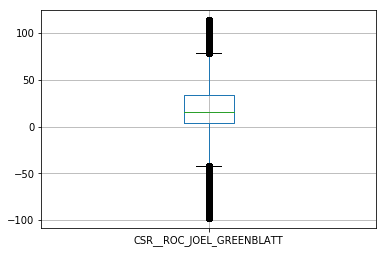

In [8]:
df.boxplot(['CSR__ROC_JOEL_GREENBLATT'])

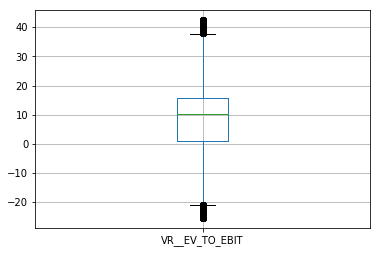

In [9]:
df.boxplot(['VR__EV_TO_EBIT'])

In [10]:
le = LabelEncoder()
df['RETURNS_vs_INDEX_NEXT'] = le.fit_transform(df['RETURNS_vs_INDEX_NEXT'])

In [11]:
df.shape

(48326, 4)

In [12]:
df.head()

,YEAR,CSR__ROC_JOEL_GREENBLATT,VR__EV_TO_EBIT,RETURNS_vs_INDEX_NEXT
0,2014,8.00,28.98,0
1,2010,9.21,24.53,1
2,2015,5.90,28.67,1
3,2012,11.46,19.82,1
4,2007,14.74,25.13,0


In [13]:
df2 = df[df['YEAR'] < 2016]

In [14]:
df2.shape

(40062, 4)

In [15]:
y = df2[['RETURNS_vs_INDEX_NEXT']].values

In [16]:
X = df2[['CSR__ROC_JOEL_GREENBLATT','VR__EV_TO_EBIT']].values

In [17]:
X.shape

(40062, 2)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [19]:
#normalizacion
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#Initializing Neural Network
classifier = Sequential()

In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu', input_dim = 2))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [22]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 1, nb_epoch =10, verbose = 2)

Epoch 1/10
 - 70s - loss: 0.6832 - acc: 0.5647
Epoch 2/10
 - 67s - loss: 0.6829 - acc: 0.5648
Epoch 3/10
 - 67s - loss: 0.6830 - acc: 0.5648
Epoch 4/10
 - 67s - loss: 0.6827 - acc: 0.5648
Epoch 5/10
 - 69s - loss: 0.6829 - acc: 0.5648
Epoch 6/10
 - 72s - loss: 0.6829 - acc: 0.5648
Epoch 7/10
 - 73s - loss: 0.6829 - acc: 0.5648
Epoch 8/10
 - 71s - loss: 0.6828 - acc: 0.5648
Epoch 9/10
 - 70s - loss: 0.6828 - acc: 0.5648
Epoch 10/10
 - 69s - loss: 0.6829 - acc: 0.5648


In [24]:
df2016 = financialDF[financialDF['YEAR'] == 2016]

In [25]:
df2016_X = df2016[['CSR__ROC_JOEL_GREENBLATT','VR__EV_TO_EBIT']].values

In [26]:
df2016.shape

(6994, 43)

In [27]:
y_predict2017 = classifier.predict(df2016_X)

In [28]:
y_predict2017

array([[8.6486163e-03],
       [1.0929011e-02],
       [9.8789446e-14],
       ...,
       [0.0000000e+00],
       [4.3946767e-27],
       [0.0000000e+00]], dtype=float32)

In [29]:
rounded = [round(x[0]) for x in y_predict2017]

# Modelo mejorado

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=2, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
y_predict2017.shape
type(y_predict2017)

numpy.ndarray

In [0]:
df2016.head(5)

,YEAR,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,CSR__ROA,PSDA__EARNINGS_PER_SHARE_DILUTED,CSR__ROIC,CSR__GROSS_MARGIN,VQ__YOY_EPS_GROWTH,VQ__YOY_EBITDA_GROWTH,PSDA__EBITDA_PER_SHARE,PSDA__TOTAL_DEBT_PER_SHARE,CSR__NET_MARGIN,IS__REVENUE,IS__NET_INCOME,IS__COST_OF_GOODS_SOLD,BS__TOTAL_EQUITY,IS__EBITDA,BS__TOTAL_ASSETS,BS__LONG_TERM_DEBT,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,INDUSTRY01,INDUSTRY02,RETURNS_NEXT,RETURNS_CAT,RETURNS_NEXT_CAT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX,RETURNS_vs_INDEX_NEXT
5,2016,ETE,20216.6045,0.00,30.44,5.63,9.07,4,0.61,0.00,0.72,1.33,0.92,10.36,18.22,-17.12,13.23,4.877,42.077,3.13,31792.000,995.000,26000.000,22446.000,5099.000,78925.000,42858.000,7277.000,0.94,20.76,10.29,19.53,0.897959,4.090011,NaN,NaN,-0.092850,POSITIVE,NEGATIVE,0.112374,0.18415,WINS,LOSES
12,2016,IGC,12.1004,-20.27,-5.31,-28.18,-40.65,5,1.27,0.90,-2.32,-14.33,-0.17,-15.85,13.24,45.16,53.06,-0.115,0.121,-44.10,6.367,-2.808,5.523,13.948,-1.891,18.859,0.801,3.199,-0.17,0.00,0.24,0.29,0.208333,0.109846,NaN,NaN,2.448276,POSITIVE,POSITIVE,0.112374,0.18415,WINS,WINS
47,2016,AGNU,4.2375,-61.11,-1.44,-231.00,-44.82,3,0.49,1.18,-2.18,-44.09,-0.23,-130.10,29.96,-475.00,-382.61,-0.222,0.059,-44.13,6.189,-2.731,4.335,3.580,-2.693,6.364,0.737,1.167,-0.23,0.00,0.49,0.24,-0.510204,0.079330,NaN,NaN,-0.589744,NEGATIVE,NEGATIVE,0.112374,0.18415,LOSES,LOSES
58,2016,ALLM,14.3420,-184.90,-2.02,-2898.23,0.00,2,0.00,2.70,-5.06,-98.30,-0.14,-62.48,0.00,0.00,-1.44,-0.141,0.031,0.00,0.000,-8.770,0.000,5.342,-8.128,9.019,0.000,3.677,-0.14,NaN,0.30,0.20,-0.333333,0.058420,NaN,NaN,-0.850000,NEGATIVE,NEGATIVE,0.112374,0.18415,LOSES,LOSES
60,2016,APPO,1.5482,-94.08,-2.47,NaN,-31300.00,3,0.00,0.00,-1131.45,-39.02,-0.01,-72.41,0.00,-25.00,0.00,-0.003,0.000,-41750.00,0.002,-0.835,0.000,-0.351,-0.351,0.007,0.000,0.358,-0.01,NaN,0.06,0.02,-0.666667,0.028392,NaN,NaN,3.000000,NEGATIVE,POSITIVE,0.112374,0.18415,LOSES,WINS


In [0]:
save = df2016[['YEAR', 'CODE', 'VQ_MARKET_CAP', 'IS_EPS_BASIC', 'IS__REVENUE', 'VR_PE_RATIO',
             'VQ__PIOTROSKI_F_SCORE', 'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK']]
save.columns = ['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
                'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK',]

y_predict2017 = pd.DataFrame(y_predict2017)
y_predict2017.columns = ['prediction']
save = pd.concat([save, y_predict2017], axis=1, join='inner')

In [0]:
save.head(5)

,YEAR,CODE,CAP,EPS,REVENUE,PER,PIOTROSKI,PRICE_START,PRICE_END,RETURNS,RISK,prediction
5,2016,ETE,20216.6045,0.94,31792.000,20.76,4,10.29,19.53,0.897959,4.090011,NaN
12,2016,IGC,12.1004,-0.17,6.367,0.00,5,0.24,0.29,0.208333,0.109846,0.000000
47,2016,AGNU,4.2375,-0.23,6.189,0.00,3,0.49,0.24,-0.510204,0.079330,0.075239
58,2016,ALLM,14.3420,-0.14,0.000,NaN,2,0.30,0.20,-0.333333,0.058420,0.033585
60,2016,APPO,1.5482,-0.01,0.002,NaN,3,0.06,0.02,-0.666667,0.028392,0.029403


In [0]:
save.to_csv('predictions5b.csv', index=False)

In [0]:
!ls

adc.json  ds_index_next.csv  predictions5.csv  predictions6.csv  sample_data


In [0]:
# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('predictions5.csv')
file.Upload()

In [0]:
# Final evaluation of the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 56.55%


# Todas las columnas del dataset

In [0]:
financialDF2 = pd.read_csv('ds_index_next.csv', sep=',',  header=0, parse_dates=True)
financialDF2.shape

(87438, 43)

In [0]:
df2 = financialDF2

In [0]:
le = LabelEncoder()
df2['RETURNS_vs_INDEX_NEXT'] = le.fit_transform(df2['RETURNS_vs_INDEX_NEXT'])



In [0]:
df2.head()

,YEAR,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,CSR__ROA,PSDA__EARNINGS_PER_SHARE_DILUTED,CSR__ROIC,CSR__GROSS_MARGIN,VQ__YOY_EPS_GROWTH,VQ__YOY_EBITDA_GROWTH,PSDA__EBITDA_PER_SHARE,PSDA__TOTAL_DEBT_PER_SHARE,CSR__NET_MARGIN,IS__REVENUE,IS__NET_INCOME,IS__COST_OF_GOODS_SOLD,BS__TOTAL_EQUITY,IS__EBITDA,BS__TOTAL_ASSETS,BS__LONG_TERM_DEBT,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,INDUSTRY01,INDUSTRY02,RETURNS_NEXT,RETURNS_CAT,RETURNS_NEXT_CAT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX,RETURNS_vs_INDEX_NEXT
0,2014,ETE,31002.7009,72.22,28.98,8.00,5.10,7,0.56,46.73,1.44,1.10,0.570,4.68,9.29,216.67,32.40,4.193,28.211,1.14,55691.000,633.00,50516.000,22329.000,4564.00,64279.000,29477.000,6683.000,0.580,50.33,20.44,28.46,0.392368,3.472920,NaN,NaN,-0.512675,POSITIVE,NEGATIVE,0.123866,-0.006928,WINS,0
1,2010,ETE,8712.4952,317.83,24.53,9.21,15.92,5,1.33,72.37,1.05,1.31,0.215,7.58,25.67,-56.57,-7.37,1.559,10.520,2.94,6556.000,193.00,4873.000,6247.732,1390.00,17378.730,9346.067,1081.075,0.215,45.44,7.65,9.53,0.245752,0.730981,NaN,NaN,0.045082,POSITIVE,POSITIVE,0.110019,-0.011220,WINS,1
2,2015,ETE,14384.6808,0.00,28.67,5.90,7.28,7,0.41,0.00,0.81,1.76,1.110,5.33,14.20,94.74,2.72,4.307,35.311,3.29,36096.000,1189.00,30971.000,23613.000,4577.00,71189.000,36837.000,4910.000,1.110,12.27,26.43,12.88,-0.512675,6.159618,NaN,NaN,0.897959,NEGATIVE,POSITIVE,-0.006928,0.112374,LOSES,1
3,2012,ETE,12732.3534,27.89,19.82,11.46,8.02,5,0.73,6.03,0.74,0.87,0.285,4.62,16.26,-17.39,48.41,3.118,19.693,1.79,16964.000,304.00,14206.000,16350.000,3326.00,48904.000,21440.000,5845.000,0.285,37.04,10.15,11.37,0.120197,0.649843,NaN,NaN,0.657980,POSITIVE,POSITIVE,0.116776,0.263905,WINS,1
4,2007,ETE,8191.2308,2122.84,25.13,14.74,11.92,5,1.16,0.00,1.52,4.15,0.388,12.49,25.23,95.96,-7.09,1.231,6.691,4.70,6792.037,319.36,5078.206,2091.156,1007.41,9462.094,5916.585,1241.433,0.390,30.33,7.74,8.86,0.144703,0.797453,NaN,NaN,-0.502987,POSITIVE,NEGATIVE,0.036538,-0.375847,WINS,0


In [0]:
df2.dropna(inplace=True)

In [0]:
X2 = df2.drop(['CODE', 'RETURNS','RETURNS_NEXT','RETURNS_CAT','RETURNS_NEXT_CAT','INDEX_RETURNS_NEXT','RETURNS_vs_INDEX','INDUSTRY01','INDUSTRY02','PRICE_START','PRICE_END','RETURNS_vs_INDEX_NEXT'], axis=1)

In [0]:
X2.head()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,CSR__ROA,PSDA__EARNINGS_PER_SHARE_DILUTED,CSR__ROIC,CSR__GROSS_MARGIN,VQ__YOY_EPS_GROWTH,VQ__YOY_EBITDA_GROWTH,PSDA__EBITDA_PER_SHARE,PSDA__TOTAL_DEBT_PER_SHARE,CSR__NET_MARGIN,IS__REVENUE,IS__NET_INCOME,IS__COST_OF_GOODS_SOLD,BS__TOTAL_EQUITY,IS__EBITDA,BS__TOTAL_ASSETS,BS__LONG_TERM_DEBT,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,RISK,INDEX_RETURNS
159,2016,423.9475,-0.16,17.71,7.69,12.30,4,1.52,1.87,1.66,5.79,0.83,8.03,19.96,-16.16,-35.78,3.272,8.523,10.62,281.117,29.846,224.995,226.570,76.564,504.296,197.843,64.781,0.84,21.73,4.458759,0.112374
160,2015,215.2494,-0.21,5.89,17.18,22.68,6,0.74,0.79,1.44,22.38,0.99,18.63,27.19,-73.74,-24.59,5.095,7.801,32.33,327.011,105.720,238.097,271.803,118.310,525.944,180.946,58.996,0.99,6.53,1.969839,-0.006928
161,2015,127.2336,-20.74,-6.52,-5.24,4.75,4,0.11,0.14,0.87,-10.37,-3.36,6.18,15.44,-360.47,-103.77,-0.186,8.029,-18.23,1124.111,-204.900,950.580,887.881,-11.385,1802.160,491.160,162.889,-3.36,0.00,1.980509,-0.006928
162,2012,1176.0372,20.66,6.20,17.90,14.64,4,0.78,1.26,1.86,7.44,2.85,12.57,25.34,-8.95,13.26,6.218,12.864,11.45,1516.772,173.720,1132.399,931.022,378.869,2351.323,596.506,314.750,2.89,6.81,1.789374,0.116776
163,2011,1176.9744,29.62,6.78,19.23,16.21,5,0.75,1.57,1.78,8.96,3.13,19.67,25.91,195.28,-43.28,5.490,14.517,12.22,1553.661,189.797,1151.117,750.389,332.907,2319.319,596.077,399.709,3.16,6.17,1.539401,-0.011220


In [0]:
X2.values

array([[ 2.01600000e+03,  4.23947500e+02, -1.60000000e-01, ...,
         2.17300000e+01,  4.45875911e+00,  1.12373695e-01],
       [ 2.01500000e+03,  2.15249400e+02, -2.10000000e-01, ...,
         6.53000000e+00,  1.96983880e+00, -6.92838905e-03],
       [ 2.01500000e+03,  1.27233600e+02, -2.07400000e+01, ...,
         0.00000000e+00,  1.98050900e+00, -6.92838905e-03],
       ...,
       [ 2.01500000e+03,  1.80783000e+01, -1.29000000e+02, ...,
         0.00000000e+00,  1.83247741e-01, -6.92838905e-03],
       [ 2.01400000e+03,  1.20522000e+02, -1.50790000e+02, ...,
         0.00000000e+00,  1.17412734e-01,  1.23865940e-01],
       [ 2.01600000e+03,  0.00000000e+00,  0.00000000e+00, ...,
         1.02000000e+01,  9.98099740e-03,  1.12373695e-01]])

In [0]:
y2 = df2[['RETURNS_vs_INDEX_NEXT']].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.1)

In [0]:
#normalizacion
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Initializing Neural Network
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 31))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 5, nb_epoch =10)

Epoch 1/10
52224/52224 [==============================] - 12s 221us/step - loss: 0.6745 - acc: 0.5899
Epoch 2/10
52224/52224 [==============================] - 11s 214us/step - loss: 0.6716 - acc: 0.5948
Epoch 3/10
52224/52224 [==============================] - 12s 234us/step - loss: 0.6705 - acc: 0.5969
Epoch 4/10
52224/52224 [==============================] - 11s 206us/step - loss: 0.6690 - acc: 0.5987
Epoch 5/10
52224/52224 [==============================] - 11s 205us/step - loss: 0.6686 - acc: 0.5994
Epoch 6/10
52224/52224 [==============================] - 11s 204us/step - loss: 0.6679 - acc: 0.6001
Epoch 7/10
52224/52224 [==============================] - 11s 205us/step - loss: 0.6673 - acc: 0.6027
Epoch 8/10
52224/52224 [==============================] - 11s 204us/step - loss: 0.6667 - acc: 0.6034
Epoch 9/10
52224/52224 [==============================] - 11s 205us/step - loss: 0.6664 - acc: 0.6031
Epoch 10/10
52224/52224 [==============================] - 11s 206us/step - loss: 

In [0]:
# Final evaluation of the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.88%


In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=31, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model,epochs = 10, batch_size = 2, verbose=2)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# LSTM

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: financials_prices_quaterly_guru_v2.csv, id: 1riRCOrb378VAkqFiIPaHKxfxHzoErdH_
title: predictions5b.csv, id: 1q3q8ji8pIK2SfCbpGvjayIDVOlXEy6q1
title: predictions5.csv, id: 1stER98-kTi-A7eAKSSLbDsS6jDfv7W7Q
title: predictions4.csv, id: 1Y-rMaEOlYLV5fJoAbuhQ9N8MKZ046e9b
title: predictions1.csv, id: 1ew9QoSnI4h_q4X2ElEBms8qpnd7hjkaW
title: Copia de predictions1.csv, id: 1Jx5RucbqtBjSc2KQ1hnK8-45l8IqQWQl
title: result.csv, id: 1o3jL0WYF3wctel0fK57RFeszpg8Ov7FS
title: result.csv, id: 1S6KQ3pZt4wSitq-dZNjJgBN4b52r0N0O
title: ds_index_next.csv, id: 1m04U6RAI-SEhghbv5VJTISb8vOn3eTeu
title: PracticaTemplate_RL_v7.ipynb, id: 10_0froV2P0lEpe02smxuti7XeHCfs4oJ
title: glove.twitter.27B.25d.txt, id: 1ALzVXpBXyFayEAw7H3XqSK-2S87Mviky
title: NLP, id: 10FEV3gmXKlR79OrxjV9PE3JE3nIvKoON
title: modelv3e.h5, id: 1anzEUt-vHzxzhyRYJJOyLs2tI_ASDKOK
title: modelv3d.h5, id: 1CvsqKt9SmiFmXA63O7DnohFX6J-aXjFy
title: modelv3c.h5, id: 1QWw2GXH0EbvttF9aPkV3qVhS5_13RA3o
title: modelv3b2.h5, id: 1PWMMtZEu44JnUAp

In [0]:
train_downloaded = drive.CreateFile({'id': '1riRCOrb378VAkqFiIPaHKxfxHzoErdH_'})
train_downloaded.GetContentFile('financials_prices_quaterly_guru_v2.csv')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('financials_prices_quaterly_guru_v2.csv')
dataset.head()

,FISCAL_YEAR,BS__ACCOUNTS_PAYABLE,BS__ACCOUNTS_PAYABLE__ACCRUED_EXPENSE,BS__ACCOUNTS_PAYABLE__ACCRUED_EXPENSE_FOR_FINANCIAL_COMPANIES,BS__ACCOUNTS_RECEIVABLE,BS__ACCUMULATED_DEPRECIATION,BS__ACCUMULATED_OTHER_COMPREHENSIVE_INCOME_LOSS,BS__ADDITIONAL_PAID_IN_CAPITAL,BS__ALLOWANCE_FOR_LOANS_AND_LEASE_LOSSES,BS__BUILDINGS_AND_IMPROVEMENTS,BS__CAPITAL_LEASE_OBLIGATION,BS__CASH_AND_CASH_EQUIVALENTS,BS__CASH_CASH_EQUIVALENTS_MARKETABLE_SECURITIES,BS__COMMON_STOCK,BS__CONSTRUCTION_IN_PROGRESS,BS__CURRENT_ACCRUED_EXPENSE,BS__CURRENT_DEFERRED_REVENUE,BS__CURRENT_DEFERRED_TAXES_LIABILITIES,BS__CURRENT_PORTION_OF_LONG_TERM_DEBT,BS__DEBT_TO_EQUITY,BS__DEFERREDTAXANDREVENUE,BS__DEFERRED_POLICY_ACQUISITION_COSTS,BS__EQUITY_INVESTMENTS,BS__EQUITY_TO_ASSET,BS__FIXED_MATURITY_INVESTMENT,BS__FUTURE_POLICY_BENEFITS,BS__GOODWILL,BS__GROSS_PROPERTY_PLANT_AND_EQUIPMENT,BS__INTANGIBLE_ASSETS,BS__INVENTORIES_FINISHED_GOODS,BS__INVENTORIES_INVENTORIES_ADJUSTMENTS,BS__INVENTORIES_OTHER,BS__INVENTORIES_RAW_MATERIALS__COMPONENTS,BS__INVENTORIES_WORK_IN_PROCESS,BS__INVESTMENTS_AND_ADVANCES,BS__LAND_AND_IMPROVEMENTS,BS__LONG_TERM_DEBT,BS__LONG_TERM_DEBT__CAPITAL_LEASE_OBLIGATION,BS__MACHINERY_FURNITURE_EQUIPMENT,BS__MARKETABLE_SECURITIES,BS__MINORITY_INTEREST,BS__MONEY_MARKET_INVESTMENTS,BS__NET_LOAN,BS__NONCURRENT_DEFERRED_LIABILITIES,BS__NOTES_RECEIVABLE,BS__OTHER_ASSETS_FOR_BANKS,BS__OTHER_ASSETS_FOR_INSURANCE_COMPANIES,BS__OTHER_CURRENT_ASSETS,BS__OTHER_CURRENT_LIABILITIES,BS__OTHER_CURRENT_PAYABLES,BS__OTHER_CURRENT_RECEIVABLES,BS__OTHER_GROSS_PPE,BS__OTHER_LIABILITIES_FOR_BANKS,BS__OTHER_LIABILITIES_FOR_INSURANCE_COMPANIES,BS__OTHER_LONG_TERM_ASSETS,BS__OTHER_LONG_TERM_LIABILITIES,BS__OTHER_STOCKHOLDERS_EQUITY,BS__PENSIONANDRETIREMENTBENEFIT,BS__POLICYHOLDER_FUNDS,BS__PREFERRED_STOCK,BS__PROPERTY_PLANT_AND_EQUIPMENT,BS__RETAINED_EARNINGS,BS__SECURITIES__INVESTMENTS,BS__SHORT_TERM_INVESTMENTS,BS__TOTAL_ASSETS,BS__TOTAL_CURRENT_ASSETS,BS__TOTAL_CURRENT_LIABILITIES,BS__TOTAL_DEPOSITS,BS__TOTAL_EQUITY,BS__TOTAL_INVENTORIES,BS__TOTAL_INVESTMENTS,BS__TOTAL_LIABILITIES,BS__TOTAL_RECEIVABLES,BS__TOTAL_STOCKHOLDERS_EQUITY,BS__TOTAL_TAX_PAYABLE,BS__TREASURY_STOCK,BS__UNEARNED_PREMIUMS,BS__UNPAID_LOSS__LOSS_RESERVE,CS__ALL_TAXES_PAID,CS__CAPITAL_EXPENDITURE,CS__CASH_FLOW_FOR_DIVIDENDS,CS__CASH_FLOW_FROM_DISCONTINUED_OPERATIONS,CS__CASH_FLOW_FROM_FINANCING,CS__CASH_FLOW_FROM_INVESTING,CS__CASH_FLOW_FROM_OPERATIONS,CS__CASH_FLOW_FROM_OTHERS,CS__CASH_FROM_DISCONTINUED_INVESTING_ACTIVITIES,CS__CASH_FROM_OTHER_INVESTING_ACTIVITIES,CS__CASH_PAID_FOR_INSURANCE_ACTIVITIES,CS__CASH_PAYMENTS,CS__CASH_PAYMENTS_FOR_DEPOSITS_BY_BANKS_AND_CUSTOMERS,CS__CASH_PAYMENTS_FOR_LOANS,CS__CASH_RECEIPTS_FROM_DEPOSITS_BY_BANKS_AND_CUSTOMERS,CS__CASH_RECEIPTS_FROM_FEES_AND_COMMISSIONS,CS__CASH_RECEIPTS_FROM_LOANS,CS__CASH_RECEIPTS_FROM_OPERATING_ACTIVITIES,CS__CASH_RECEIPTS_FROM_SECURITIES_RELATED_ACTIVITIES,CS__CASH_RECEIPTS_FROM_TAX_REFUNDS,CS__CASH_RECEIVED_FROM_INSURANCE_ACTIVITIES,CS__CHANGE_IN_DEFERREDTAX,CS__CHANGE_IN_INVENTORY,CS__CHANGE_IN_PAYABLES_AND_ACCRUED_EXPENSE,CS__CHANGE_IN_PREPAID_ASSETS,CS__CHANGE_IN_RECEIVABLES,CS__CHANGE_IN_WORKING_CAPITAL,CS__DEPRECIATION_DEPLETION_AND_AMORTIZATION,CS__DIVIDENDS_PAID,CS__DIVIDENDS_RECEIVED,CS__FFO,CS__FREE_CASH_FLOW,CS__INTEREST_AND_COMMISSION_PAID,CS__INTEREST_PAID,CS__INTEREST_RECEIVED,CS__ISSUANCE_OF_STOCK,CS__NET_CHANGE_IN_CASH,CS__NET_FOREIGN_CURRENCY_EXCHANGE_GAIN,CS__NET_INCOME,CS__NET_INCOME_FROM_CONTINUING_OPERATIONS,CS__NET_INTANGIBLES_PURCHASE_AND_SALE,CS__NET_ISSUANCE_OF_DEBT,CS__NET_ISSUANCE_OF_PREFERRED_STOCK,CS__OTHER_CASH_PAYMENTS_FROM_OPERATING_ACTIVITIES,CS__OTHER_CASH_RECEIPTS_FROM_OPERATING_ACTIVITIES,CS__OTHER_FINANCING,CS__PAYMENTS_ON_BEHALF_OF_EMPLOYEES,CS__PAYMENTS_TO_SUPPLIERS_FOR_GOODS_AND_SERVICES,CS__PURCHASE_OF_BUSINESS,CS__PURCHASE_OF_INVESTMENT,CS__PURCHASE_OF_PROPERTY_PLANT_EQUIPMENT,CS__RECEIPTS_FROM_CUSTOMERS,CS__RECEIPTS_FROM_GOVERNMENT_GRANTS,CS__REPURCHASE_OF_STOCK,CS__SALE_OF_BUSINESS,CS__SALE_

In [0]:
dataset.drop(['INDEX_RETURNS_NEXT', 'RETURNS_NEXT_CAT', 'RETURNS_vs_INDEX_NEXT'], axis=1, inplace=True)
dataset.head()

,FISCAL_YEAR,BS__ACCOUNTS_PAYABLE,BS__ACCOUNTS_PAYABLE__ACCRUED_EXPENSE,BS__ACCOUNTS_PAYABLE__ACCRUED_EXPENSE_FOR_FINANCIAL_COMPANIES,BS__ACCOUNTS_RECEIVABLE,BS__ACCUMULATED_DEPRECIATION,BS__ACCUMULATED_OTHER_COMPREHENSIVE_INCOME_LOSS,BS__ADDITIONAL_PAID_IN_CAPITAL,BS__ALLOWANCE_FOR_LOANS_AND_LEASE_LOSSES,BS__BUILDINGS_AND_IMPROVEMENTS,BS__CAPITAL_LEASE_OBLIGATION,BS__CASH_AND_CASH_EQUIVALENTS,BS__CASH_CASH_EQUIVALENTS_MARKETABLE_SECURITIES,BS__COMMON_STOCK,BS__CONSTRUCTION_IN_PROGRESS,BS__CURRENT_ACCRUED_EXPENSE,BS__CURRENT_DEFERRED_REVENUE,BS__CURRENT_DEFERRED_TAXES_LIABILITIES,BS__CURRENT_PORTION_OF_LONG_TERM_DEBT,BS__DEBT_TO_EQUITY,BS__DEFERREDTAXANDREVENUE,BS__DEFERRED_POLICY_ACQUISITION_COSTS,BS__EQUITY_INVESTMENTS,BS__EQUITY_TO_ASSET,BS__FIXED_MATURITY_INVESTMENT,BS__FUTURE_POLICY_BENEFITS,BS__GOODWILL,BS__GROSS_PROPERTY_PLANT_AND_EQUIPMENT,BS__INTANGIBLE_ASSETS,BS__INVENTORIES_FINISHED_GOODS,BS__INVENTORIES_INVENTORIES_ADJUSTMENTS,BS__INVENTORIES_OTHER,BS__INVENTORIES_RAW_MATERIALS__COMPONENTS,BS__INVENTORIES_WORK_IN_PROCESS,BS__INVESTMENTS_AND_ADVANCES,BS__LAND_AND_IMPROVEMENTS,BS__LONG_TERM_DEBT,BS__LONG_TERM_DEBT__CAPITAL_LEASE_OBLIGATION,BS__MACHINERY_FURNITURE_EQUIPMENT,BS__MARKETABLE_SECURITIES,BS__MINORITY_INTEREST,BS__MONEY_MARKET_INVESTMENTS,BS__NET_LOAN,BS__NONCURRENT_DEFERRED_LIABILITIES,BS__NOTES_RECEIVABLE,BS__OTHER_ASSETS_FOR_BANKS,BS__OTHER_ASSETS_FOR_INSURANCE_COMPANIES,BS__OTHER_CURRENT_ASSETS,BS__OTHER_CURRENT_LIABILITIES,BS__OTHER_CURRENT_PAYABLES,BS__OTHER_CURRENT_RECEIVABLES,BS__OTHER_GROSS_PPE,BS__OTHER_LIABILITIES_FOR_BANKS,BS__OTHER_LIABILITIES_FOR_INSURANCE_COMPANIES,BS__OTHER_LONG_TERM_ASSETS,BS__OTHER_LONG_TERM_LIABILITIES,BS__OTHER_STOCKHOLDERS_EQUITY,BS__PENSIONANDRETIREMENTBENEFIT,BS__POLICYHOLDER_FUNDS,BS__PREFERRED_STOCK,BS__PROPERTY_PLANT_AND_EQUIPMENT,BS__RETAINED_EARNINGS,BS__SECURITIES__INVESTMENTS,BS__SHORT_TERM_INVESTMENTS,BS__TOTAL_ASSETS,BS__TOTAL_CURRENT_ASSETS,BS__TOTAL_CURRENT_LIABILITIES,BS__TOTAL_DEPOSITS,BS__TOTAL_EQUITY,BS__TOTAL_INVENTORIES,BS__TOTAL_INVESTMENTS,BS__TOTAL_LIABILITIES,BS__TOTAL_RECEIVABLES,BS__TOTAL_STOCKHOLDERS_EQUITY,BS__TOTAL_TAX_PAYABLE,BS__TREASURY_STOCK,BS__UNEARNED_PREMIUMS,BS__UNPAID_LOSS__LOSS_RESERVE,CS__ALL_TAXES_PAID,CS__CAPITAL_EXPENDITURE,CS__CASH_FLOW_FOR_DIVIDENDS,CS__CASH_FLOW_FROM_DISCONTINUED_OPERATIONS,CS__CASH_FLOW_FROM_FINANCING,CS__CASH_FLOW_FROM_INVESTING,CS__CASH_FLOW_FROM_OPERATIONS,CS__CASH_FLOW_FROM_OTHERS,CS__CASH_FROM_DISCONTINUED_INVESTING_ACTIVITIES,CS__CASH_FROM_OTHER_INVESTING_ACTIVITIES,CS__CASH_PAID_FOR_INSURANCE_ACTIVITIES,CS__CASH_PAYMENTS,CS__CASH_PAYMENTS_FOR_DEPOSITS_BY_BANKS_AND_CUSTOMERS,CS__CASH_PAYMENTS_FOR_LOANS,CS__CASH_RECEIPTS_FROM_DEPOSITS_BY_BANKS_AND_CUSTOMERS,CS__CASH_RECEIPTS_FROM_FEES_AND_COMMISSIONS,CS__CASH_RECEIPTS_FROM_LOANS,CS__CASH_RECEIPTS_FROM_OPERATING_ACTIVITIES,CS__CASH_RECEIPTS_FROM_SECURITIES_RELATED_ACTIVITIES,CS__CASH_RECEIPTS_FROM_TAX_REFUNDS,CS__CASH_RECEIVED_FROM_INSURANCE_ACTIVITIES,CS__CHANGE_IN_DEFERREDTAX,CS__CHANGE_IN_INVENTORY,CS__CHANGE_IN_PAYABLES_AND_ACCRUED_EXPENSE,CS__CHANGE_IN_PREPAID_ASSETS,CS__CHANGE_IN_RECEIVABLES,CS__CHANGE_IN_WORKING_CAPITAL,CS__DEPRECIATION_DEPLETION_AND_AMORTIZATION,CS__DIVIDENDS_PAID,CS__DIVIDENDS_RECEIVED,CS__FFO,CS__FREE_CASH_FLOW,CS__INTEREST_AND_COMMISSION_PAID,CS__INTEREST_PAID,CS__INTEREST_RECEIVED,CS__ISSUANCE_OF_STOCK,CS__NET_CHANGE_IN_CASH,CS__NET_FOREIGN_CURRENCY_EXCHANGE_GAIN,CS__NET_INCOME,CS__NET_INCOME_FROM_CONTINUING_OPERATIONS,CS__NET_INTANGIBLES_PURCHASE_AND_SALE,CS__NET_ISSUANCE_OF_DEBT,CS__NET_ISSUANCE_OF_PREFERRED_STOCK,CS__OTHER_CASH_PAYMENTS_FROM_OPERATING_ACTIVITIES,CS__OTHER_CASH_RECEIPTS_FROM_OPERATING_ACTIVITIES,CS__OTHER_FINANCING,CS__PAYMENTS_ON_BEHALF_OF_EMPLOYEES,CS__PAYMENTS_TO_SUPPLIERS_FOR_GOODS_AND_SERVICES,CS__PURCHASE_OF_BUSINESS,CS__PURCHASE_OF_INVESTMENT,CS__PURCHASE_OF_PROPERTY_PLANT_EQUIPMENT,CS__RECEIPTS_FROM_CUSTOMERS,CS__RECEIPTS_FROM_GOVERNMENT_GRANTS,CS__REPURCHASE_OF_STOCK,CS__SALE_OF_BUSINESS,CS__SALE_

In [0]:
aapl = dataset.query('Ticker == "AAPL"')
aapl.shape

(120, 323)

In [0]:
aapl.drop(['FISCAL_YEAR', 'RETURNS_NEXT', 'REGION', 'PRELIMINARY', 'Ticker', 'RETURNS_CAT', 'RETURNS_vs_INDEX'], axis=1, inplace=True)
for c in aapl.columns:
    p = aapl[c].isnull().sum()/aapl.shape[0]
    if p != 0:
        aapl.drop([c], axis = 1, inplace=True)

In [0]:
aapl.head()

,BS__ACCOUNTS_PAYABLE,BS__ACCOUNTS_PAYABLE__ACCRUED_EXPENSE,BS__ACCOUNTS_RECEIVABLE,BS__ACCUMULATED_DEPRECIATION,BS__ACCUMULATED_OTHER_COMPREHENSIVE_INCOME_LOSS,BS__ADDITIONAL_PAID_IN_CAPITAL,BS__BUILDINGS_AND_IMPROVEMENTS,BS__CAPITAL_LEASE_OBLIGATION,BS__CASH_AND_CASH_EQUIVALENTS,BS__CASH_CASH_EQUIVALENTS_MARKETABLE_SECURITIES,BS__COMMON_STOCK,BS__CONSTRUCTION_IN_PROGRESS,BS__CURRENT_ACCRUED_EXPENSE,BS__CURRENT_DEFERRED_REVENUE,BS__CURRENT_DEFERRED_TAXES_LIABILITIES,BS__CURRENT_PORTION_OF_LONG_TERM_DEBT,BS__DEFERREDTAXANDREVENUE,BS__EQUITY_TO_ASSET,BS__GOODWILL,BS__GROSS_PROPERTY_PLANT_AND_EQUIPMENT,BS__INTANGIBLE_ASSETS,BS__INVENTORIES_FINISHED_GOODS,BS__INVENTORIES_INVENTORIES_ADJUSTMENTS,BS__INVENTORIES_OTHER,BS__INVENTORIES_RAW_MATERIALS__COMPONENTS,BS__INVENTORIES_WORK_IN_PROCESS,BS__INVESTMENTS_AND_ADVANCES,BS__LAND_AND_IMPROVEMENTS,BS__LONG_TERM_DEBT,BS__LONG_TERM_DEBT__CAPITAL_LEASE_OBLIGATION,BS__MACHINERY_FURNITURE_EQUIPMENT,BS__MARKETABLE_SECURITIES,BS__MINORITY_INTEREST,BS__NONCURRENT_DEFERRED_LIABILITIES,BS__NOTES_RECEIVABLE,BS__OTHER_CURRENT_ASSETS,BS__OTHER_CURRENT_LIABILITIES,BS__OTHER_CURRENT_PAYABLES,BS__OTHER_CURRENT_RECEIVABLES,BS__OTHER_GROSS_PPE,BS__OTHER_LONG_TERM_ASSETS,BS__OTHER_LONG_TERM_LIABILITIES,BS__OTHER_STOCKHOLDERS_EQUITY,BS__PENSIONANDRETIREMENTBENEFIT,BS__PREFERRED_STOCK,BS__PROPERTY_PLANT_AND_EQUIPMENT,BS__RETAINED_EARNINGS,BS__TOTAL_ASSETS,BS__TOTAL_CURRENT_ASSETS,BS__TOTAL_CURRENT_LIABILITIES,BS__TOTAL_EQUITY,BS__TOTAL_INVENTORIES,BS__TOTAL_LIABILITIES,BS__TOTAL_RECEIVABLES,BS__TOTAL_STOCKHOLDERS_EQUITY,BS__TOTAL_TAX_PAYABLE,BS__TREASURY_STOCK,CS__CAPITAL_EXPENDITURE,CS__CASH_FLOW_FOR_DIVIDENDS,CS__CASH_FLOW_FROM_DISCONTINUED_OPERATIONS,CS__CASH_FLOW_FROM_FINANCING,CS__CASH_FLOW_FROM_INVESTING,CS__CASH_FLOW_FROM_OPERATIONS,CS__CASH_FLOW_FROM_OTHERS,CS__CASH_FROM_DISCONTINUED_INVESTING_ACTIVITIES,CS__CASH_FROM_OTHER_INVESTING_ACTIVITIES,CS__CHANGE_IN_DEFERREDTAX,CS__CHANGE_IN_INVENTORY,CS__CHANGE_IN_PAYABLES_AND_ACCRUED_EXPENSE,CS__CHANGE_IN_PREPAID_ASSETS,CS__CHANGE_IN_RECEIVABLES,CS__CHANGE_IN_WORKING_CAPITAL,CS__DEPRECIATION_DEPLETION_AND_AMORTIZATION,CS__FREE_CASH_FLOW,CS__ISSUANCE_OF_STOCK,CS__NET_CHANGE_IN_CASH,CS__NET_FOREIGN_CURRENCY_EXCHANGE_GAIN,CS__NET_INCOME,CS__NET_INCOME_FROM_CONTINUING_OPERATIONS,CS__NET_INTANGIBLES_PURCHASE_AND_SALE,CS__NET_ISSUANCE_OF_DEBT,CS__NET_ISSUANCE_OF_PREFERRED_STOCK,CS__OTHER_FINANCING,CS__PURCHASE_OF_BUSINESS,CS__PURCHASE_OF_INVESTMENT,CS__PURCHASE_OF_PROPERTY_PLANT_EQUIPMENT,CS__REPURCHASE_OF_STOCK,CS__SALE_OF_BUSINESS,CS__SALE_OF_INVESTMENT,CS__SALE_OF_PROPERTY_PLANT_EQUIPMENT,CS__STOCK_BASED_COMPENSATION,CSR__ASSET_TURNOVER,CSR__CASH_CONVERSION_CYCLE,CSR__COGS_TO_REVENUE,CSR__DAYS_INVENTORY,CSR__DAYS_PAYABLE,CSR__DAYS_SALES_OUTSTANDING,CSR__DEBT_TO_ASSET,CSR__DIVIDEND_PAYOUT_RATIO,CSR__EFFECTIVE_INTEREST_RATE_ON_DEBT,CSR__EQUITY_TO_ASSET,CSR__FCF_MARGIN,CSR__GROSS_MARGIN,CSR__GROSS_PROFIT_TO_ASSET,CSR__INVENTORY_TO_REVENUE,CSR__INVENTORY_TURNOVER,CSR__NET_MARGIN,CSR__OPERATING_MARGIN,CSR__ROA,CSR__ROC_JOEL_GREENBLATT,CSR__ROE,CSR__ROE__ADJUSTED_TO_BOOK_VALUE,CSR__ROIC,CSR__WACC,IS__ADVERTISING,IS__COST_OF_GOODS_SOLD,IS__DEPRECIATION_DEPLETION_AND_AMORTIZATION,IS__EBITDA,IS__EPS_BASIC,IS__EPS_DILUTED,IS__GAIN_ON_SALE_OF_SECURITY,IS__GROSS_MARGIN,IS__GROSS_PROFIT,IS__IMPAIRMENT_OF_CAPITAL_ASSETS,IS__INTEREST_EXPENSE,IS__INTEREST_INCOME,IS__NET_INCOME,IS__NET_INCOME_CONTINUING_OPERATIONS,IS__NET_INCOME_DISCONTINUED_OPERATIONS,IS__NET_INTEREST_INCOME,IS__NET_MARGIN,IS__NON_OPERATING_INCOME,IS__OPERATING_INCOME,IS__OPERATING_MARGIN,IS__OTHER_INCOME_EXPENSE,IS__OTHER_INCOME_MINORITY_INTEREST,IS__OTHER_OPERATING_EXPENSE,IS__PREFERRED_DIVIDENDS,IS__PRE_TAX_INCOME,IS__RESEARCH__DEVELOPMENT,IS__RESTRUCTURING_AND_MERGERN_ACQUISITION,IS__REVENUE,IS__SELLING_GENERAL__ADMIN_EXPENSE,IS__SHARES_OUTSTANDING_DILUTED_AVERAGE,IS__TAX_PROVISION,IS__TAX_RATE,IS__WRITE_OFF,PSDA__BOOK_VALUE_PER_SHARE,PSDA__DIVIDENDS_PER_SHARE,PSDA__EARNINGS_PER_SHARE_DILUTED,PSDA__EB

In [0]:
aapl.shape

(120, 210)

In [0]:
aapl.dropna(inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [0]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # frecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(aapl)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [0]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var102(t-1),var103(t-1),var104(t-1),var105(t-1),var106(t-1),var107(t-1),var108(t-1),var109(t-1),var110(t-1),var111(t-1),var112(t-1),var113(t-1),var114(t-1),var115(t-1),var116(t-1),var117(t-1),var118(t-1),var119(t-1),var120(t-1),var121(t-1),var122(t-1),var123(t-1),var124(t-1),var125(t-1),var126(t-1),var127(t-1),var128(t-1),var129(t-1),var130(t-1),var131(t-1),var132(t-1),var133(t-1),var134(t-1),var135(t-1),var136(t-1),var137(t-1),var138(t-1),var139(t-1),var140(t-1),var141(t-1),var142(t-1),var143(t-1),var144(t-1),var145(t-1),var146(t-1),var147(t-1),var148(t-1),var149(t-1),var150(t-1),var151(t-1),var152(t-1),var153(t-1),var154(t-1),var155(t-1),var156(t-1),var157(t-1),var158(t-1),var159(t-1),var160(t-1),var161(t-1),var162(t-1),var163(t-1),var164(t-1),var165(t-1),var166(t-1),var167(t-1),var168(t-1),var169(t-1),var170(t-1),var171(t-1),var172(t-1),var173(t-1),var174(t-1),var175(t-1),var176(t-1),var177(t-1),var178(t-1),var179(t-1),var180(t-1),var181(t-1),var182(t-1),var183(t-1),var184(t-1),var185(t-1),var186(t-1),var187(t-1),var188(t-1),var189(t-1),var190(t-1),var191(t-1),var192(t-1),var193(t-1),var194(t-1),var195(t-1),var196(t-1),var197(t-1),var198(t-1),var199(t-1),var200(t-1),var201(t-1),var202(t-1),var203(t-1),var204(t-1),var205(t-1),var206(t-1),var207(t-1),var208(t-1),var209(t-1),var210(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t),var32(t),var33(t),var34(t),var35(t),var36(t),var37(t),var38(t),var39(t),var40(t),var41(t),var42(t),var43(t),var44(t),var45(t),var46(t),var47(t),var48(t),var49(t),var50(t),var51(t),var52(t),var53(t),var54(t),var55(t),var56(t),var57(t),var58(t),var59(t),var60(t),var61(t),var62(t),var63(t),var64(t),var65(t),var66(t),var67(t),var68(t),var69(t),var70(t),var71(t),var72(t),var73(t),var74(t),var75(t),var76(t),var77(t),var78(t),var79(t),var80(t),var81(t),var82(t),var83(t),var84(t),var85(t),var86(t),var87(t),var88(t),var89(t),var90(t),var91(t),var92(t),var93(t),var94(t),var95(t),var96(t),var97(t),var98(t),var99(t),var100(t),var101(t),var102(t),var103(t),var104(t),var105(t),var106(t),var107(t),var108(t),var109(t),var110(t),var111(t),var112(t),var113(t),var114(t),var115(t),var116(t),var117(t),var118(t),var119(t),var120(t),var121(t),var122(t),var123(t),var124(t),var125(t),var126(t),var127(t),var128(t),var129(t),var130(t),var131(t),var132(t),var133(t),var134(t),var135(t),var136(t),var137(t),var138(t),var139(t),var140(t),var141(t),var142(t),var143(t),var144(t),var145(t),var146(t),var147(t),var148(t),var149(t),var150(t),var151(t),var152(t),var153(t),var154(t),var155(t),var156(t),var157(t),var158(t),var159(t),var160(t),var161(t),var162(t),var163(t),var164(t),var165(t),var166(t),var167(t),var168(t),var169(t),var17

In [0]:
for i in range(aapl.shape[1]+1, aapl.shape[1]*2):
  reframed.drop(reframed.columns[[aapl.shape[1]+1]], axis=1, inplace=True)

In [0]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var38(t-1),var39(t-1),var40(t-1),var41(t-1),var42(t-1),var43(t-1),var44(t-1),var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var54(t-1),var55(t-1),var56(t-1),var57(t-1),var58(t-1),var59(t-1),var60(t-1),var61(t-1),var62(t-1),var63(t-1),var64(t-1),var65(t-1),var66(t-1),var67(t-1),var68(t-1),var69(t-1),var70(t-1),var71(t-1),var72(t-1),var73(t-1),var74(t-1),var75(t-1),var76(t-1),var77(t-1),var78(t-1),var79(t-1),var80(t-1),var81(t-1),var82(t-1),var83(t-1),var84(t-1),var85(t-1),var86(t-1),var87(t-1),var88(t-1),var89(t-1),var90(t-1),var91(t-1),var92(t-1),var93(t-1),var94(t-1),var95(t-1),var96(t-1),var97(t-1),var98(t-1),var99(t-1),var100(t-1),var101(t-1),var102(t-1),var103(t-1),var104(t-1),var105(t-1),var106(t-1),var107(t-1),var108(t-1),var109(t-1),var110(t-1),var111(t-1),var112(t-1),var113(t-1),var114(t-1),var115(t-1),var116(t-1),var117(t-1),var118(t-1),var119(t-1),var120(t-1),var121(t-1),var122(t-1),var123(t-1),var124(t-1),var125(t-1),var126(t-1),var127(t-1),var128(t-1),var129(t-1),var130(t-1),var131(t-1),var132(t-1),var133(t-1),var134(t-1),var135(t-1),var136(t-1),var137(t-1),var138(t-1),var139(t-1),var140(t-1),var141(t-1),var142(t-1),var143(t-1),var144(t-1),var145(t-1),var146(t-1),var147(t-1),var148(t-1),var149(t-1),var150(t-1),var151(t-1),var152(t-1),var153(t-1),var154(t-1),var155(t-1),var156(t-1),var157(t-1),var158(t-1),var159(t-1),var160(t-1),var161(t-1),var162(t-1),var163(t-1),var164(t-1),var165(t-1),var166(t-1),var167(t-1),var168(t-1),var169(t-1),var170(t-1),var171(t-1),var172(t-1),var173(t-1),var174(t-1),var175(t-1),var176(t-1),var177(t-1),var178(t-1),var179(t-1),var180(t-1),var181(t-1),var182(t-1),var183(t-1),var184(t-1),var185(t-1),var186(t-1),var187(t-1),var188(t-1),var189(t-1),var190(t-1),var191(t-1),var192(t-1),var193(t-1),var194(t-1),var195(t-1),var196(t-1),var197(t-1),var198(t-1),var199(t-1),var200(t-1),var201(t-1),var202(t-1),var203(t-1),var204(t-1),var205(t-1),var206(t-1),var207(t-1),var208(t-1),var209(t-1),var210(t-1),var1(t)
1,0.000000,0.000000,0.0,0.995492,0.534444,0.0,0.0,0.0,0.012111,0.006205,0.0,0.0,0.0,0.0,0.0,0.006246,0.0,0.692529,0.0,0.004925,0.0,0.0,0.0,0.095057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007327,0.0,0.007334,0.053159,0.0,0.023264,0.053222,0.003972,0.000002,0.382091,0.0,0.0,0.005441,0.006661,0.005118,0.012398,0.007143,0.007157,0.060232,0.004046,0.012550,0.007157,0.0,0.0,1.0,0.999726,0.0,0.820762,0.519956,0.019567,0.415781,0.0,0.502953,0.93886,0.656871,0.652188,0.0,0.348529,0.128652,0.0,0.023157,0.295005,0.492901,0.0,0.035568,0.040759,1.0,0.269165,0.0,0.119392,1.0,0.583245,0.995964,1.0,0.0,0.33699,0.0,0.0,0.831852,0.496988,0.0,0.0,0.0,0.0,0.183735,0.02500,0.0,0.692529,0.370587,0.249353,0.840215,0.252241,0.0,0.598538,0.121239,0.586144,0.000000,0.73936,0.841442,0.000000,0.000000,0.0,0.0,0.0,0.029122,0.059023,0.059454,0.0,0.249353,0.046302,0.0,1.0,0.0,0.035568,0.040759,0.0,0.0,0.598538,0.453519,0.033297,0.121239,0.789429,0.0,0.745828,0.0,0.041557,0.0,0.380054,0.001853,0.0,0.360074,0.941216,0.0,0.0,0.010584,0.004110,0.059454,0.038017,0.041224,0.059454,0.03844,0.005795,0.032568,0.027966,0.007513,0.011228,0.001501,0.073879,0.569656,1.0,0.651376,0.637168,0.00125,0.004177,0.010989,0.005122,0.0,0.005622,0.004033,0.010566,0.001418,0.005795,0.959669,0.911678,0.950071,0.0,0.0,0.000254,0.000000,0.473373,0.128326,1.000000,0.364395,0.070035,0.378568,0.338322,0.266333,0.511817,0.000000,0.663834,0.682507,0.770194,0.186047,0.107008,0.508687,0.0,0.054392,0.0,0.0,0.0,0.495767,0.174326,0.0,0.277606,0.006927,0.005795,0.504422,0.000000
2,0.000000,0.000000,0.0,1.000000,0.534444,0.

In [0]:
# split into train and test sets
values = reframed.values
train = values[:100, :]
test = values[100:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(100, 1, 210) (100,) (19, 1, 210) (19,)


In [0]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train on 100 samples, validate on 19 samples
Epoch 1/50
 - 1s - loss: 0.1462 - val_loss: 0.2126
Epoch 2/50
 - 0s - loss: 0.1023 - val_loss: 0.1158
Epoch 3/50
 - 0s - loss: 0.1284 - val_loss: 0.1129
Epoch 4/50
 - 0s - loss: 0.0728 - val_loss: 0.1262
Epoch 5/50
 - 0s - loss: 0.0401 - val_loss: 0.1116
Epoch 6/50
 - 0s - loss: 0.0492 - val_loss: 0.1271
Epoch 7/50
 - 0s - loss: 0.0308 - val_loss: 0.1677
Epoch 8/50
 - 0s - loss: 0.0391 - val_loss: 0.1308
Epoch 9/50
 - 0s - loss: 0.0237 - val_loss: 0.1070
Epoch 10/50
 - 0s - loss: 0.0379 - val_loss: 0.1066
Epoch 11/50
 - 0s - loss: 0.0277 - val_loss: 0.1054
Epoch 12/50
 - 0s - loss: 0.0275 - val_loss: 0.1086
Epoch 13/50
 - 0s - loss: 0.0301 - val_loss: 0.1188
Epoch 14/50
 - 0s - loss: 0.0215 - val_loss: 0.1250
Epoch 15/50
 - 0s - loss: 0.0253 - val_loss: 0.1143
Epoch 16/50
 - 0s - loss: 0.0184 - val_loss: 0.1047
Epoch 17/50
 - 0s - loss: 0.0246 - val_loss: 0.1069
Epoch 18/50
 - 0s - loss: 0.0180 - val_loss: 0.1147
Epoch 19/50
 - 0s - loss: 0.

NameError: ignored

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)